Recommendation System hmare pass 4 types ki hoti hain
1. Popularity Based---trending videos on youtube
2. Content Based---content matching---hashtags
3. Colaborative filtering---users ka interest dekhte hue IronMan Movie Or BatMan Movie(means kai similar user)
4. hybrid---Content_Based Or Colaborative_Filtering ka Mixture hai

#### Hhum yahan pr Content_Based use kren gai

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

In [2]:
movies = pd.read_csv("movies.csv")
credits = pd.read_csv("credits.csv")

In [3]:
movies.shape, credits.shape

((4803, 20), (4803, 4))

In [4]:
movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [5]:
movies["genres"][0]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [6]:
import json

In [7]:
json.loads(movies["genres"][0])

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [8]:
json.loads(movies["production_companies"][0])

[{'name': 'Ingenious Film Partners', 'id': 289},
 {'name': 'Twentieth Century Fox Film Corporation', 'id': 306},
 {'name': 'Dune Entertainment', 'id': 444},
 {'name': 'Lightstorm Entertainment', 'id': 574}]

In [9]:
json.loads(movies["production_countries"][0])

[{'iso_3166_1': 'US', 'name': 'United States of America'},
 {'iso_3166_1': 'GB', 'name': 'United Kingdom'}]

In [10]:
credits.head(2)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [11]:
json.loads(credits["cast"][0])[:2]

[{'cast_id': 242,
  'character': 'Jake Sully',
  'credit_id': '5602a8a7c3a3685532001c9a',
  'gender': 2,
  'id': 65731,
  'name': 'Sam Worthington',
  'order': 0},
 {'cast_id': 3,
  'character': 'Neytiri',
  'credit_id': '52fe48009251416c750ac9cb',
  'gender': 1,
  'id': 8691,
  'name': 'Zoe Saldana',
  'order': 1}]

In [12]:
json.loads(credits["crew"][0])[:2]

[{'credit_id': '52fe48009251416c750aca23',
  'department': 'Editing',
  'gender': 0,
  'id': 1721,
  'job': 'Editor',
  'name': 'Stephen E. Rivkin'},
 {'credit_id': '539c47ecc3a36810e3001f87',
  'department': 'Art',
  'gender': 2,
  'id': 496,
  'job': 'Production Design',
  'name': 'Rick Carter'}]

In [13]:
# Data Merging

In [14]:
movie_credits = pd.merge(movies,credits, left_on = "id", right_on = "movie_id")
movie_credits.shape

(4803, 24)

In [15]:
movie_credits.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [16]:
movie_credits.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title_x', 'vote_average',
       'vote_count', 'movie_id', 'title_y', 'cast', 'crew'],
      dtype='object')

In [17]:
# REelease Date
movie_credits["release_date"] = pd.to_datetime(movie_credits["release_date"])
movie_credits["release_date"].head()

0   2009-12-10
1   2007-05-19
2   2015-10-26
3   2012-07-16
4   2012-03-07
Name: release_date, dtype: datetime64[ns]

In [18]:
# Release Year
release_year = movie_credits["release_date"].dt.year.value_counts(dropna = False)

In [19]:
# need to filter the data so that you only retain records for years where there were
release_year = release_year[release_year >= 100].sort_index()
release_year.index = release_year.index.astype(int)
release_year

1997    112
1998    133
1999    171
2000    166
2001    183
2002    203
2003    169
2004    204
2005    217
2006    237
2007    195
2008    227
2009    247
2010    225
2011    223
2012    208
2013    231
2014    238
2015    216
2016    104
Name: release_date, dtype: int64

In [20]:
# now we have to convert it into list
years = release_year.index.to_list()
movies_counts = release_year.values.tolist()

In [21]:
#years
#movies_counts

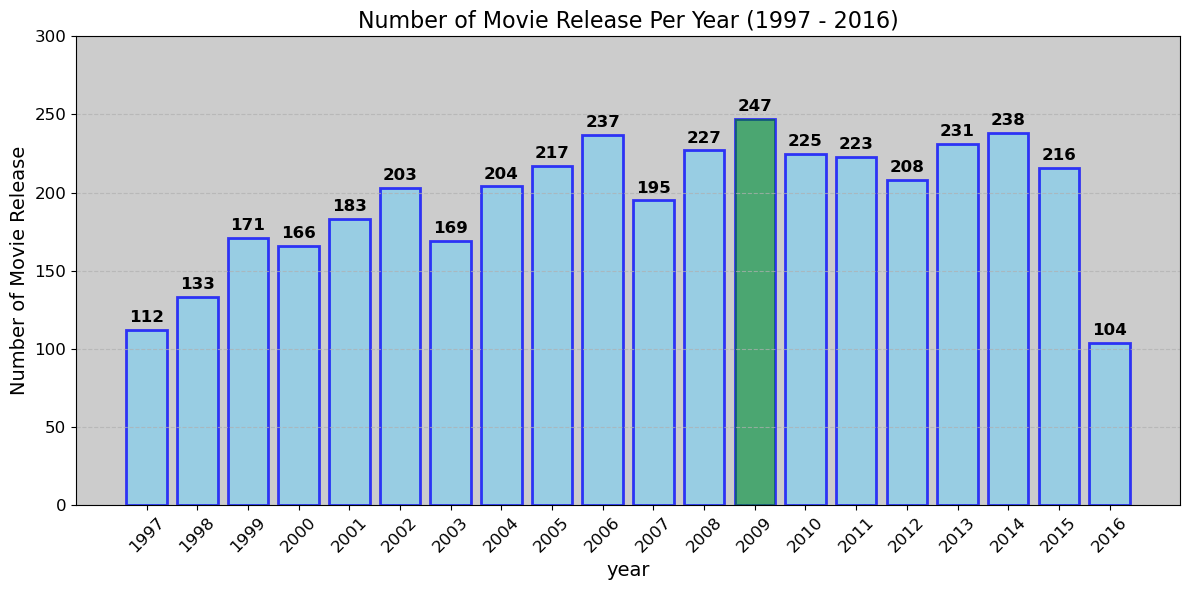

In [22]:
import matplotlib.pyplot as plt

# Find tha year with the highest movie releases
max_count_year = years[movies_counts.index(max(movies_counts))]

# Create a stylish bar chart
plt.figure(figsize=(12, 6))
plt.bar(years, movies_counts, color = "skyblue", alpha = 0.75, edgecolor = "blue", linewidth=2)
plt.xlabel("year", fontsize = 14)
plt.ylabel("Number of Movie Release", fontsize=14)
plt.title("Number of Movie Release Per Year (1997 - 2016)", fontsize = 16)
plt.xticks(rotation = 45, fontsize = 12)
plt.yticks(fontsize = 12)
plt.grid(axis = "y", linestyle='--', alpha=0.7)
plt.grid(axis = "x", linestyle= "")

# Highlight the bar for the year with the highest movie releases
highlighted_bar = years.index(max_count_year)
plt.bar(years[highlighted_bar], movies_counts[highlighted_bar], color="green", alpha = 0.5)

# Customised y-ticks range
plt.yticks(range(0, 301, 50), fontsize=12)

# Adding Data Labels
for year, count in zip(years, movies_counts):
    plt.text(year, count + 5, str(count), ha="center", fontsize = 12, fontweight="bold")
    
# Customize tick labels
plt.xticks(years, rotation = 45, fontsize = 12)
plt.yticks(fontsize=12)

# Adding a background color
ax = plt.gca()
ax.set_facecolor("#CCCCCC") 

# Display the Chart With Improved aesthetics
plt.tight_layout()
plt.show()

In [23]:
movies["popularity"].agg(func=["min","max","mean"])

min       0.000000
max     875.581305
mean     21.492301
Name: popularity, dtype: float64

### Budget vs Revenue Scatter Plot:
    
    Create a Scatter Plot to visualize the relationship between budget and revenue 
    for the movies. This can help identify if there's a correlation between the two.   

In [24]:
budget = movie_credits["budget"]
revenue = movie_credits["revenue"]

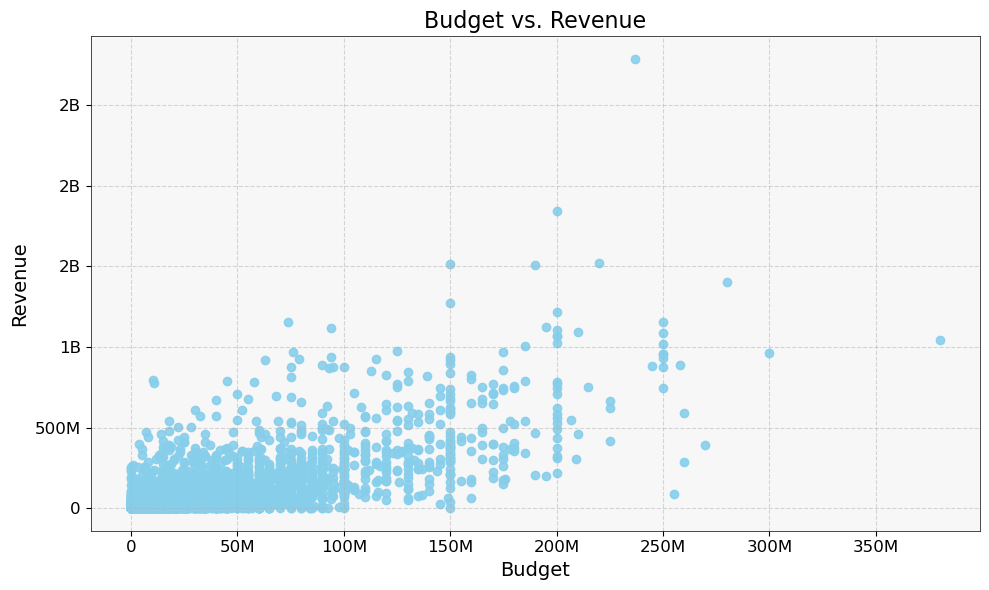

In [25]:
# Function to format budget values as alphanumeric units

def format_budget(value, pos):
    if value >= 1e9:
        return f'{value / 1e9:.0f}B'
    elif value >= 1e6:
        return f'{value / 1e6:.0f}M'
    elif value >= 1e3:
        return f'{value / 1e3:.0f}K'
    else:
        return f'{value:.0f}'
    
# Create a Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(budget, revenue, color="skyblue", alpha = 0.9)
plt.xlabel("Budget", fontsize=14)
plt.ylabel("Revenue", fontsize=14)
plt.title("Budget vs. Revenue", fontsize=16)

# Customize the appearance
plt.grid(True, linestyle ="--", alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gca().spines["top"].set_linewidth(0.5)
plt.gca().spines["right"].set_linewidth(0.5)
plt.gca().spines["bottom"].set_linewidth(0.5)
plt.gca().spines["left"].set_linewidth(0.5)

# Add a Background Color
plt.gca().set_facecolor("#f7f7f7")

# Update x-axis and y-axis ticks labels using the format_budget function
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(format_budget))
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(format_budget))

plt.tight_layout()
plt.show()

### Genre Distribution Bar Chart:

    Create a bar chart to show the distribution of movie genres. You can count the number of movies in each genre category
    and display it as a bar chart.

In [26]:
movie_credits["genres"][0]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [27]:
genre_data = movie_credits["genres"]
genre_data

0       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
1       [{"id": 12, "name": "Adventure"}, {"id": 14, "...
2       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
3       [{"id": 28, "name": "Action"}, {"id": 80, "nam...
4       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
                              ...                        
4798    [{"id": 28, "name": "Action"}, {"id": 80, "nam...
4799    [{"id": 35, "name": "Comedy"}, {"id": 10749, "...
4800    [{"id": 35, "name": "Comedy"}, {"id": 18, "nam...
4801                                                   []
4802                  [{"id": 99, "name": "Documentary"}]
Name: genres, Length: 4803, dtype: object

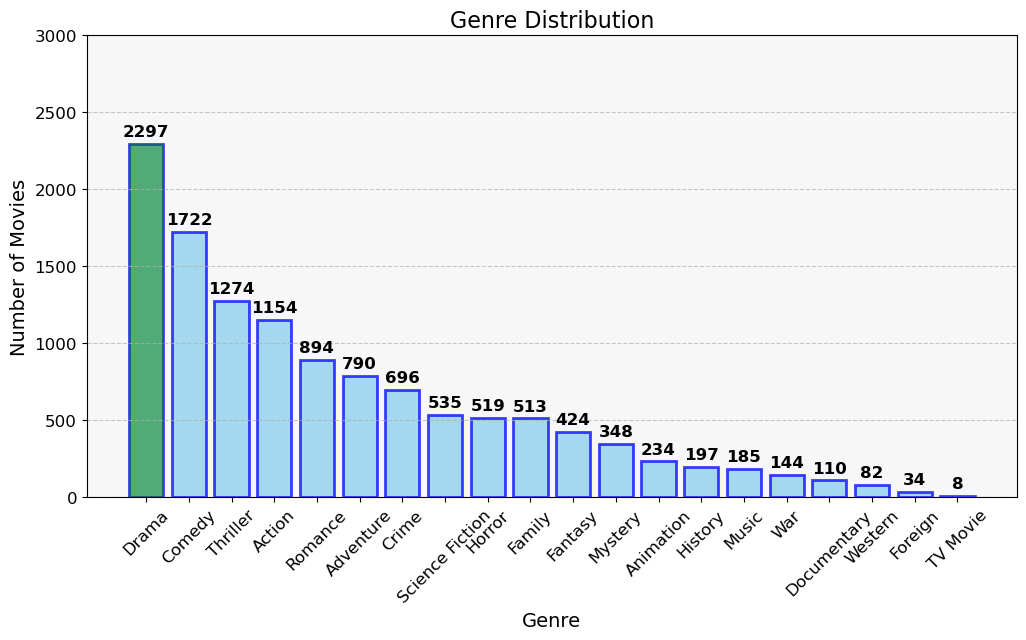

In [28]:
# Create a DataFrame from the sample Data
df = pd.DataFrame({'genres': genre_data})

# Function to extract genre names from JSON data
def extract_genres(genre_json):
    genres = json.loads(genre_json)
    return [genre["name"] for genre in genres]

# Apply the extracts_genres function to each row in the DataFrame
df["genre_names"] = df["genres"].apply(extract_genres)

# Flatten the list of genre names
all_genres = [genre for genres in df["genre_names"] for genre in genres]

# Count the accurrence of each genre
genre_counts = pd.Series(all_genres).value_counts()

# Find the most common genre
most_common_genre = genre_counts.idxmax()

# Create a stylish bar chart
plt.figure(figsize=(12, 6))
plt.bar(genre_counts.index , genre_counts.values, color="skyblue", alpha=0.75, edgecolor="blue", linewidth=2)
plt.xlabel("Genre", fontsize=14)
plt.ylabel("Number of Movies", fontsize=14)
plt.title("Genre Distribution", fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.grid(axis='x', linestyle="")

# Highlight the most common genre
plt.bar(most_common_genre, genre_counts[most_common_genre], color="green", alpha=0.5)

# Customize y-ticks range
plt.yticks(range(0, 3001, 500), fontsize=12)

# Adding  data labels
for genre, count in zip(genre_counts.index, genre_counts.values):
    plt.text(genre, count + 50, str(count), ha="center", fontsize=12, fontweight="bold")

# Adding a background color
ax = plt.gca()
ax.set_facecolor("#f7f7f7")

### Release Date Time Series:
    Create a time series plot to show, how the number of movies release has changed over time.
    You can group the data by year or month and plot the count of movies releasedm

In [29]:
movie_credits["release_date"]

0      2009-12-10
1      2007-05-19
2      2015-10-26
3      2012-07-16
4      2012-03-07
          ...    
4798   1992-09-04
4799   2011-12-26
4800   2013-10-13
4801   2012-05-03
4802   2005-08-05
Name: release_date, Length: 4803, dtype: datetime64[ns]

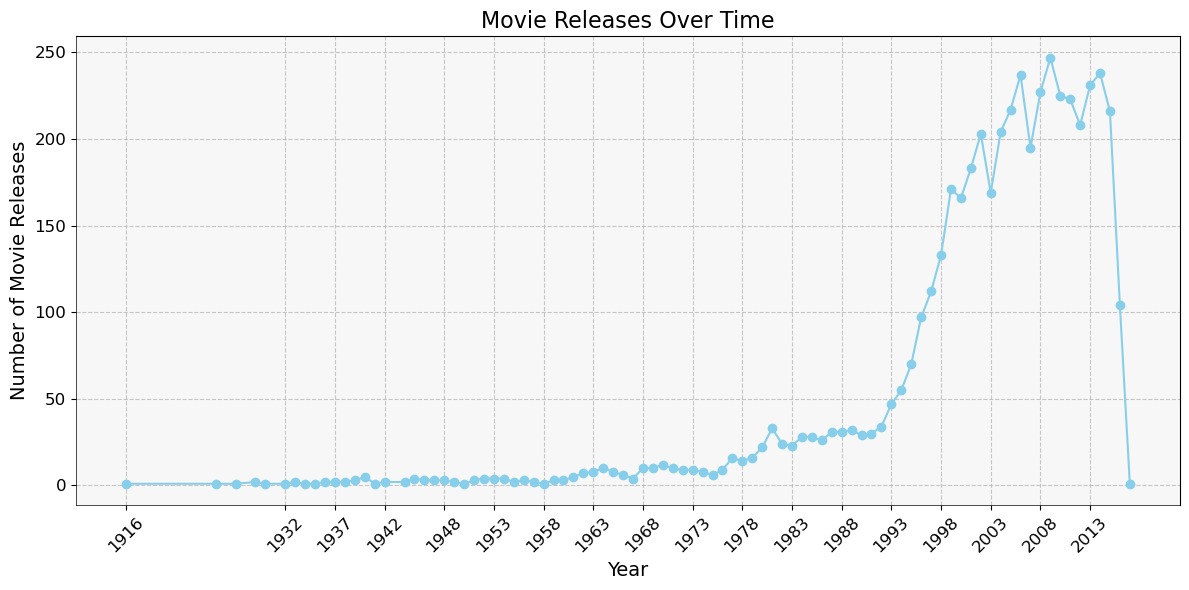

In [30]:
release_dates = movie_credits["release_date"]

# Extract the release years from the dates
release_years = release_dates.dt.year

# Count the number of movies release per year
movie_count_per_year = release_years.value_counts().sort_index()

# Create a time series plot
plt.figure(figsize=(12, 6))
plt.plot(movie_count_per_year.index, movie_count_per_year.values, marker="o", color="skyblue")
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Movie Releases", fontsize=14)
plt.title("Movie Releases Over Time", fontsize=16)

# Customize the appearance
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)
plt.gca().spines["top"].set_visible(0.5)
plt.gca().spines["right"].set_visible(0.5)
plt.gca().spines["bottom"].set_linewidth(0.5)
plt.gca().spines["left"].set_linewidth(0.5)

# Adding  background color
plt.gca().set_facecolor("#f7f7f7")

# Limit the number of x-axis ticks
plt.xticks(movie_count_per_year.index[::5]) # Show every 5 years

plt.tight_layout()
plt.show()

### Language Distribution Pie Chart:
    Visualize the distribution of original languages in your dataset using a pie chart.
    It can show which languages are the most common.

In [31]:
df = movie_credits[["spoken_languages"]]
df.head()

,spoken_languages
0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso..."
1,"[{""iso_639_1"": ""en"", ""name"": ""English""}]"
2,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},..."
3,"[{""iso_639_1"": ""en"", ""name"": ""English""}]"
4,"[{""iso_639_1"": ""en"", ""name"": ""English""}]"


In [32]:
# Function to Extract language names from the JSON data
def extract_languages(language_json):
    languages = json.loads(language_json)
    return [lang["name"] for lang in languages]

In [33]:
all_languages = df["spoken_languages"].apply(extract_languages)
all_languages.head()

0                                 [English, Español]
1                                          [English]
2    [Français, English, Español, Italiano, Deutsch]
3                                          [English]
4                                          [English]
Name: spoken_languages, dtype: object

In [34]:
final_languages = []
for i in all_languages.values:
    final_languages.extend(i)

In [35]:
final_languages[:10]

['English',
 'Español',
 'English',
 'Français',
 'English',
 'Español',
 'Italiano',
 'Deutsch',
 'English',
 'English']

In [36]:
# Count the accurrences of each language
language_counts = pd.Series(final_languages).value_counts()

# Filter languages with more than 100 accurrences
language_counts = language_counts[language_counts > 100]
language_counts

English     4485
Français     437
Español      351
Deutsch      262
Italiano     188
Pусский      185
普通话          107
dtype: int64

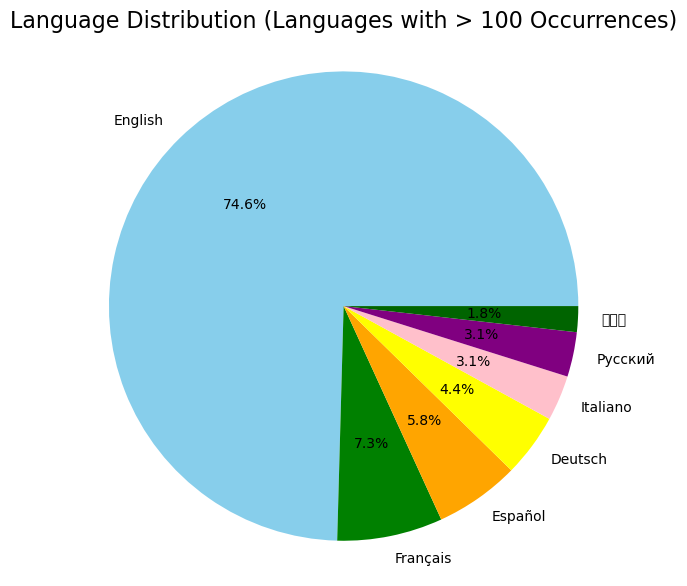

In [37]:
# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(language_counts, labels=language_counts.index, autopct='%1.1f%%', colors=['skyblue',"green","orange","yellow","pink","purple","darkgreen"])
plt.title("Language Distribution (Languages with > 100 Occurrences)", fontsize=16)

plt.axis("equal") # Equal aspect ratio ensures that pie is drawn as a circle.

plt.tight_layout()
plt.show()

### Vote Average Distribution Histogram:
    Create a histogrm to show the distribution of vote averages for movies.
    This can help you to understand the genreral sentiment or rating distribution of the movies.

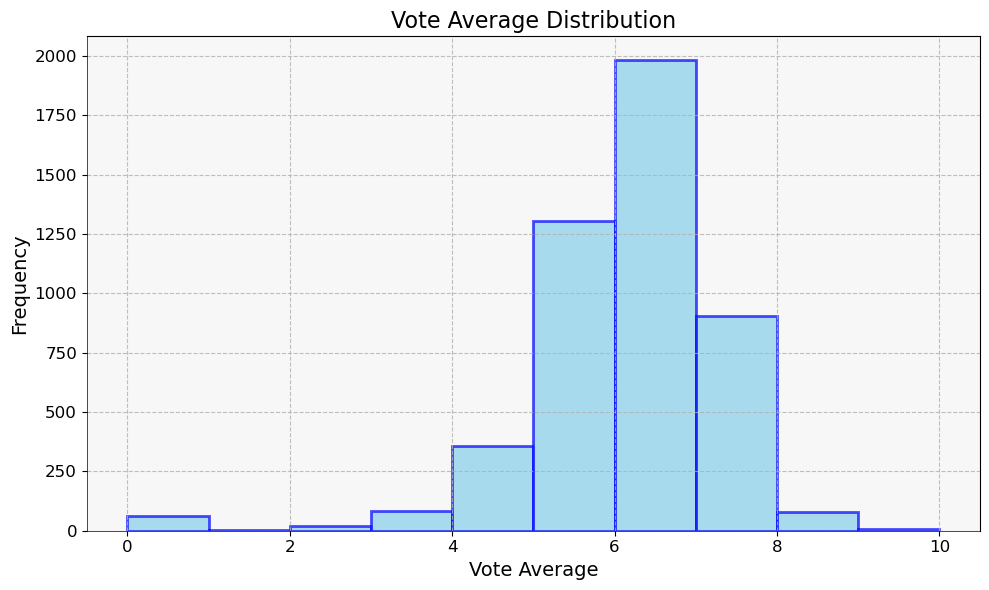

In [38]:
vote_averages = movie_credits["vote_average"].values

# Create a histogram
plt.figure(figsize=(10,6))
plt.hist(vote_averages, bins = 10, color="skyblue", edgecolor="blue", alpha=0.7, linewidth=2)
plt.xlabel("Vote Average", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Vote Average Distribution", fontsize=16)

# Customize the appearance
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle="--", alpha=0.8)
plt.gca().spines["top"].set_visible(0.5)
plt.gca().spines["right"].set_visible(0.5)
plt.gca().spines["bottom"].set_linewidth(0.5)
plt.gca().spines["left"].set_linewidth(0.5)

# Add a background color
plt.gca().set_facecolor("#f7f7f7")

plt.tight_layout()
plt.show()

### Tagline Word Cloud:
    Generate a word cloud from movie taglines to visualize the most common words or 
    phrases used in movie marketing

In [39]:
movie_credits["tagline"].dropna()

0                             Enter the World of Pandora.
1          At the end of the world, the adventure begins.
2                                   A Plan No One Escapes
3                                         The Legend Ends
4                    Lost in our world, found in another.
                              ...                        
4795              Sometimes you've got to break the rules
4796                   What happens if it actually works?
4798    He didn't come looking for trouble, but troubl...
4799    A newlywed couple's honeymoon is upended by th...
4801                             A New Yorker in Shanghai
Name: tagline, Length: 3959, dtype: object

In [40]:
#!pip install wordcloud

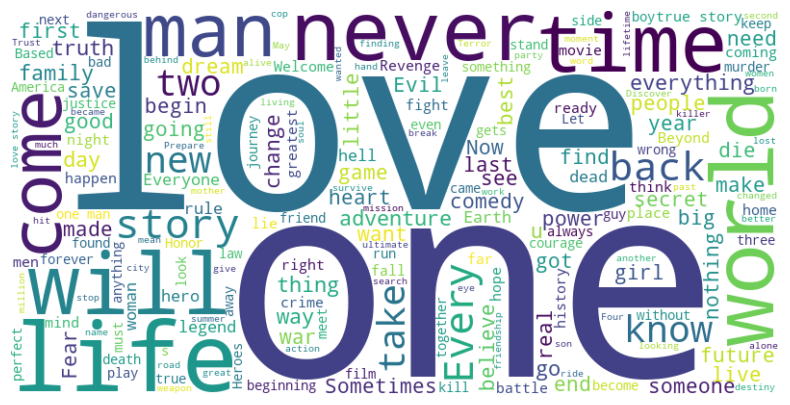

In [41]:
from wordcloud import WordCloud

taglines = movie_credits["tagline"].dropna()

# Combine all taglines into a single text
taglines_text = " ".join(taglines)

# Generate the WordCloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(taglines_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off") # Turn off the axis labels

plt.show()

In [42]:
taglines[taglines.str.contains("love")]

11          For love, for hate, for justice, for revenge.
110     It takes a moment to change history. It takes ...
124     Only the act of true love will thaw a frozen h...
145     For passion. For honor. For destiny. For victo...
164            The faces you love. The action you expect.
                              ...                        
4567             There are two sides to every love story.
4603                   Sometimes, love really is a bitch.
4631                     It's not who you love. It's how.
4655                  Everybody needs some bunny to love.
4696    A (sort of) love story between two guys over a...
Name: tagline, Length: 172, dtype: object

### Correlation Heatmap:
    Create a heatmap to visualize the correlations between numerical columns like budget, revenue, vote average
    and vote count. This can help to identify strong relationships between variables.  

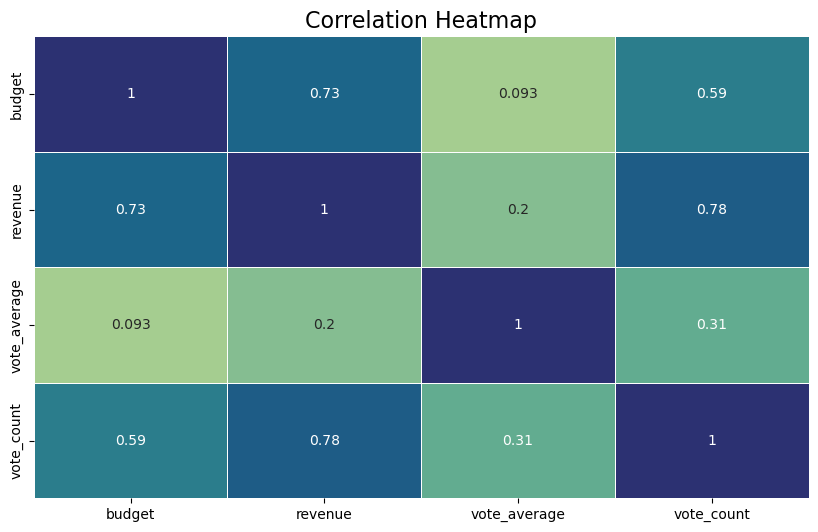

In [43]:
df = movie_credits[["budget", "revenue", "vote_average", "vote_count"]]

# Create a correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="crest", linewidths=0.5, cbar = False)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

### Overview Word Cloud:
    Generate a word cloud from movie overviews to visualize the most common
    Words of themes in movie descriptions.

In [44]:
movie_credits["overview"].isnull().sum()

3

In [45]:
movie_credits["overview"].dropna().values.tolist()[:3]

['In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.',
 'Captain Barbossa, long believed to be dead, has come back to life and is headed to the edge of the Earth with Will Turner and Elizabeth Swann. But nothing is quite as it seems.',
 'A cryptic message from Bond’s past sends him on a trail to uncover a sinister organization. While M battles political forces to keep the secret service alive, Bond peels back the layers of deceit to reveal the terrible truth behind SPECTRE.']

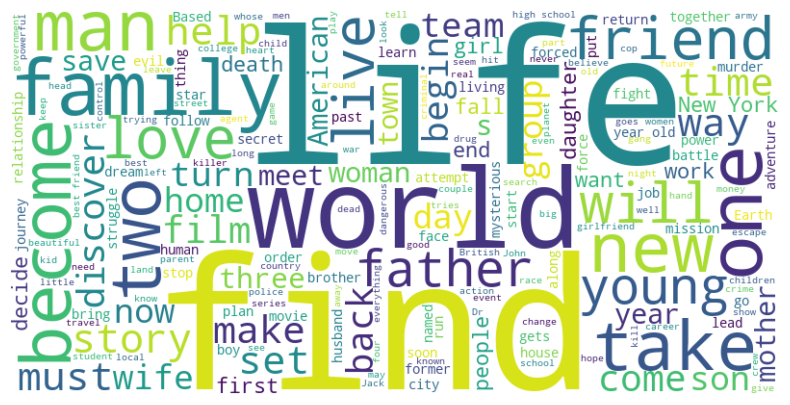

In [46]:
# Sample data : List of movie overviews
overviews = movie_credits["overview"].dropna().values.tolist()

# Combine all overviews into a single text
overviews_text = " ".join(overviews)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(overviews_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

plt.show()